In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]= df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.nan)

In [7]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

si = SimpleImputer()

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
df.loc[:, "Glucose": "BMI"]= si.fit_transform(df.loc[:,"Glucose": "BMI"])

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
x= df.iloc[:,:-1]
y = df['Outcome'] 

In [14]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [18]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))
    print(classification_report(ytest,ypred))

In [19]:
predict(KNeighborsClassifier(n_neighbors=5))

0.8175895765472313
0.7922077922077922
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        99
           1       0.73      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [21]:
trainac =[]
testac = []


for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [22]:
trainac

[1.0,
 0.8306188925081434,
 0.8534201954397395,
 0.8078175895765473,
 0.8175895765472313,
 0.8029315960912052,
 0.8029315960912052,
 0.7996742671009772,
 0.7980456026058632,
 0.7882736156351792,
 0.7866449511400652,
 0.7719869706840391,
 0.7801302931596091,
 0.7817589576547231,
 0.7768729641693811,
 0.7736156351791531,
 0.7752442996742671,
 0.7687296416938111,
 0.7671009771986971,
 0.7736156351791531,
 0.757328990228013,
 0.7654723127035831,
 0.7719869706840391,
 0.757328990228013,
 0.7719869706840391,
 0.7703583061889251,
 0.7654723127035831,
 0.7687296416938111,
 0.7654723127035831]

In [23]:
testac

[0.6818181818181818,
 0.7272727272727273,
 0.8051948051948052,
 0.7857142857142857,
 0.7922077922077922,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7727272727272727,
 0.7857142857142857,
 0.7922077922077922,
 0.7987012987012987,
 0.8051948051948052,
 0.7987012987012987,
 0.7792207792207793,
 0.7857142857142857,
 0.8116883116883117,
 0.8051948051948052,
 0.7987012987012987,
 0.8051948051948052,
 0.7857142857142857,
 0.7792207792207793,
 0.7792207792207793,
 0.7922077922077922,
 0.7792207792207793,
 0.7857142857142857,
 0.7857142857142857,
 0.7727272727272727]

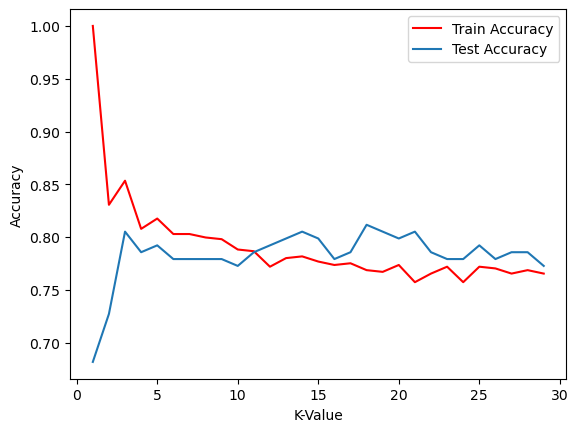

In [25]:
plt.plot(range(1,30), trainac, color = 'red', label = 'Train Accuracy')
plt.plot(range(1,30), testac, label = 'Test Accuracy')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()

In [26]:
predict(KNeighborsClassifier(n_neighbors=11))

0.7866449511400652
0.7857142857142857
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

